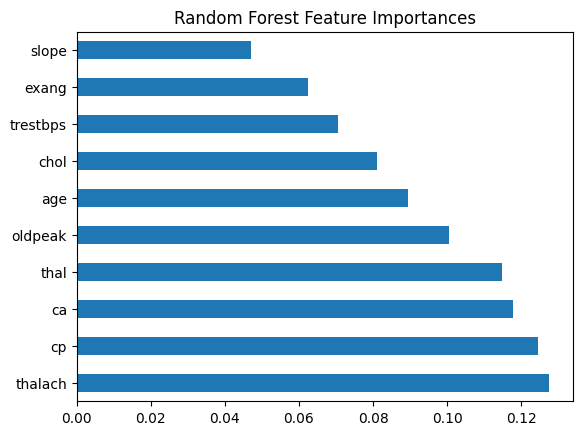

C:\Users\noorm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top features by RFE: ['sex', 'cp', 'exang', 'slope', 'ca']


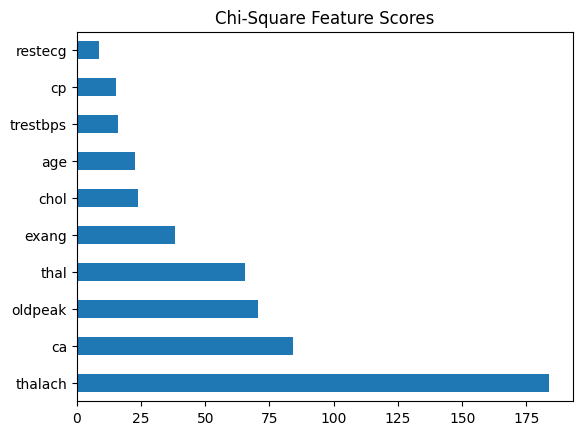

In [1]:
# %% [markdown]
# 03_feature_selection.ipynb
# This notebook applies feature selection methods.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from pathlib import Path

ROOT = Path("..").resolve()

DATA_DIR = ROOT / "data"
RESULTS_DIR = ROOT / "results"

CLEANED_CSV = DATA_DIR / "heart_disease_cleaned.csv"
df = pd.read_csv(CLEANED_CSV)

X = df.drop(columns=["target"])
y = df["target"]

# %%
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh")
plt.title("Random Forest Feature Importances")
plt.savefig(RESULTS_DIR / "rf_feature_importances.png")
plt.show()

# %%
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X, y)
selected = pd.Series(rfe.support_, index=X.columns)
print("Top features by RFE:", selected[selected==True].index.tolist())

# %%
chi_scores = SelectKBest(chi2, k=5)
chi_scores.fit(X, y)
chi2_scores = pd.Series(chi_scores.scores_, index=X.columns)
chi2_scores.nlargest(10).plot(kind="barh")
plt.title("Chi-Square Feature Scores")
plt.savefig(RESULTS_DIR / "chi2_feature_scores.png")
plt.show()
